## Imports

In [1]:
import os
import math
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from read_data import *

## Set Styles for transfer

In [2]:
styles = {
    0 : 'Gorodets',
    1 : 'Gzhel',
    2 : 'Iznik',
    3 : 'Khokhloma',
    4 : 'Neglyubka',
    5 : 'Wycinanki_Å‚owickie',
    6 : 'Wzory_kaszubskie'
}

style_1 = styles[1]
style_2 = styles[4]

## Set saving / restoring

In [3]:
restoring_mode = True
saving_mode = True

restoring_name = 'first_model.ckpt'
saving_name = 'first_model.ckpt'

restoring_path = os.path.join('models', style_1 + ' =|= ' + style_2, restoring_name)
saving_path = os.path.join('models', style_1 + ' =|= ' + style_2, saving_name)

## Adjust Hyperparameters

In [4]:
EPOCHS = 1
BATCH_SIZE = 4
IMG_SIZE = 150

## Build the model and deploy it on a device

In [5]:
with tf.device('/cpu:0'):
    
    #==================[ READ AND PROCESS THE INPUT ]==================#
            
    # load training data from input queues     
    images_1 = inputs(style_1, BATCH_SIZE, EPOCHS)
    images_2 = inputs(style_2, BATCH_SIZE, EPOCHS)
    
    # normalize the images     
    images_1 = (tf.cast(images_1, tf.float32) / 255.0)
    images_2 = (tf.cast(images_2, tf.float32) / 255.0)

## Create the session and start the threads for input queues

In [6]:
# create the session saver
# saver = tf.train.Saver()

# create a session for running operations in the graph.
sess = tf.Session()

# create the variable initializers
init_op = tf.group(tf.global_variables_initializer(),
                   tf.local_variables_initializer())

# initialize the variables
sess.run(init_op)

# if restoring_mode:
#     # previously saved model is restored
#     saver.restore(sess, restoring_path)
    
# start input enqueue threads.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

## Training loop

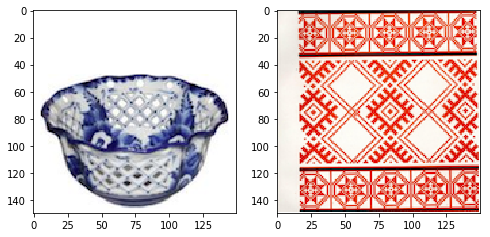

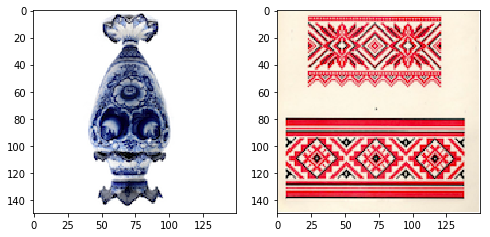

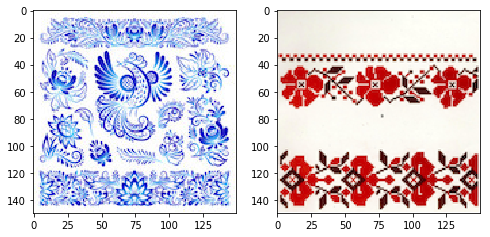

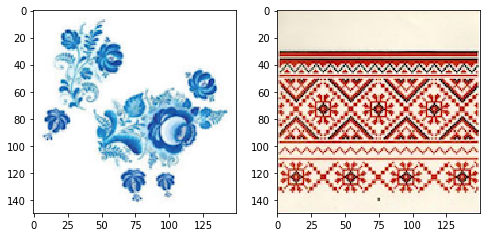

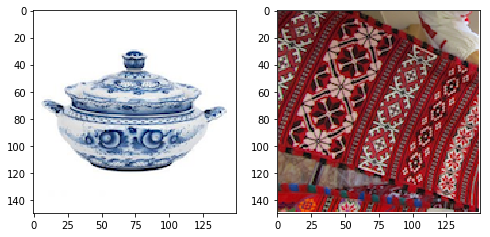

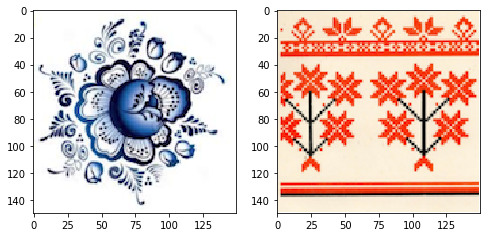

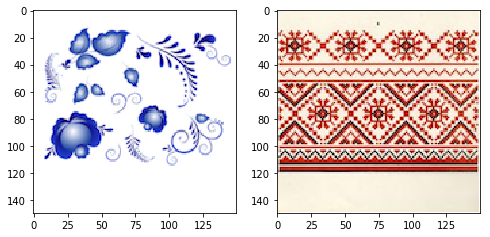

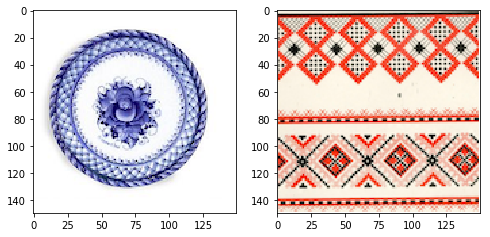

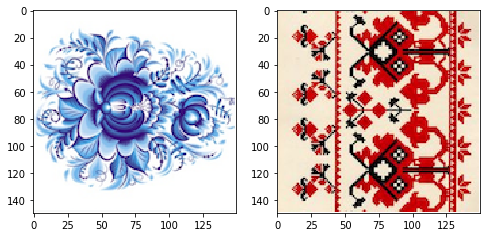

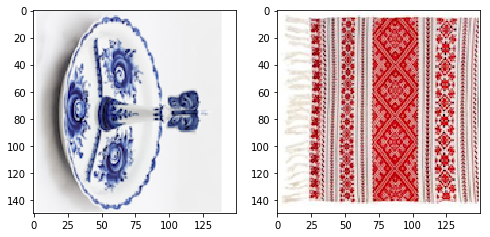

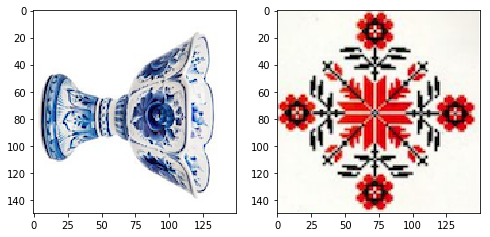

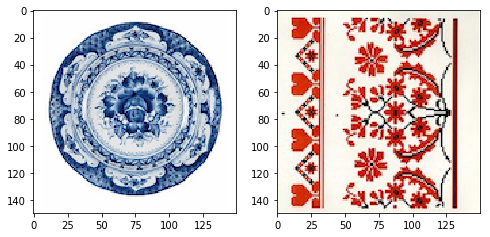

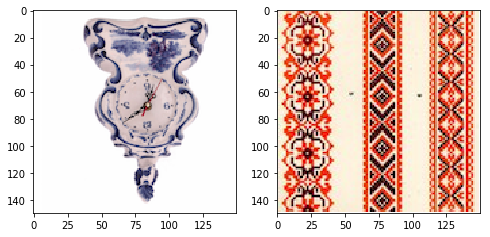

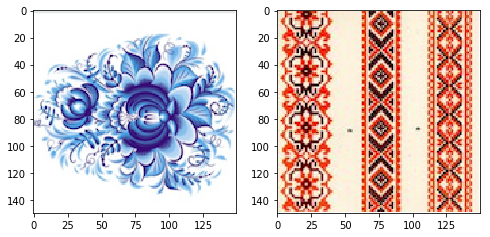

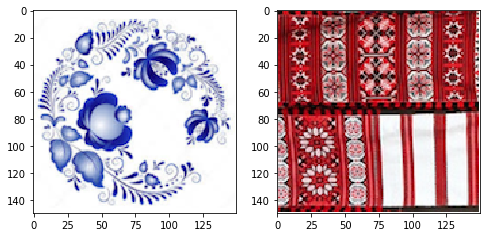

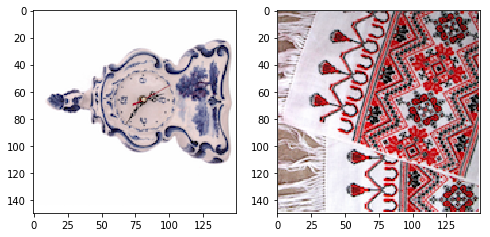

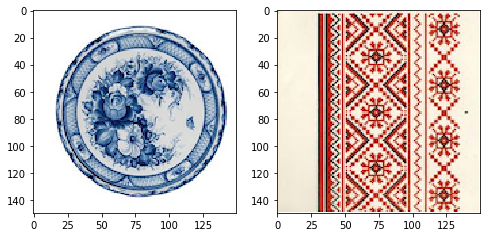

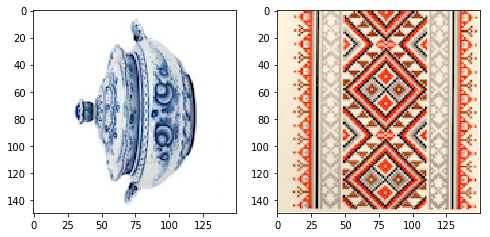

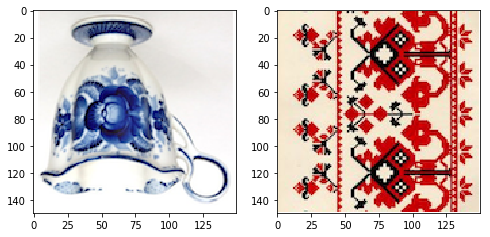

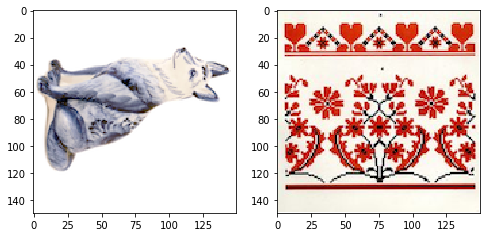

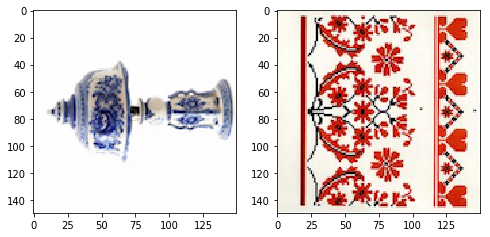

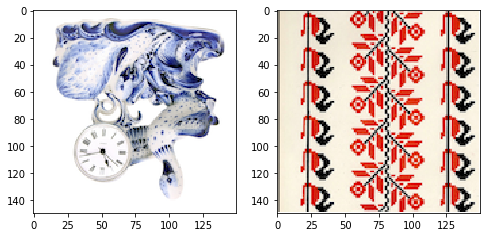

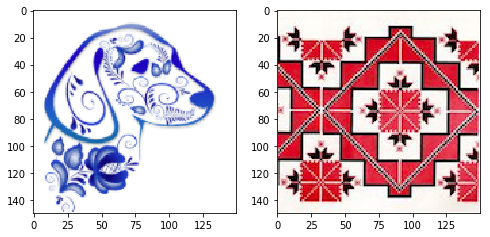

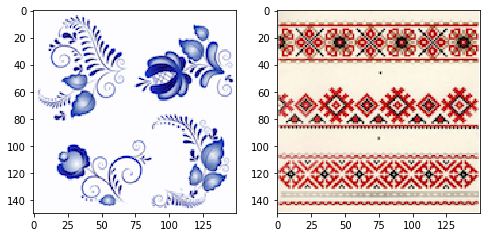

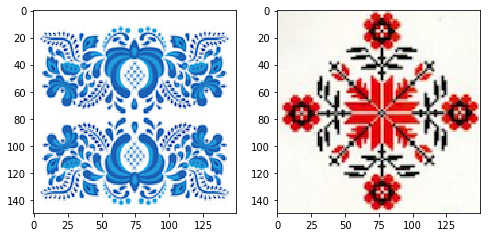

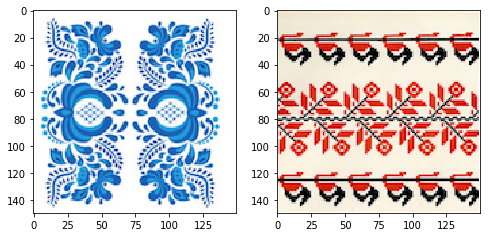

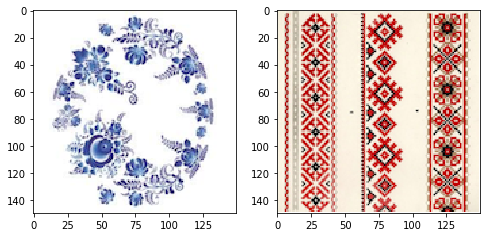

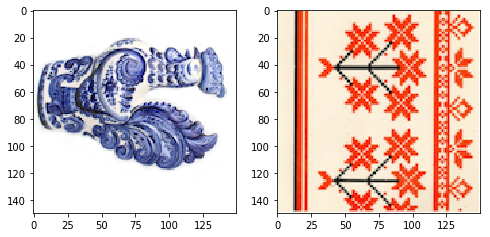

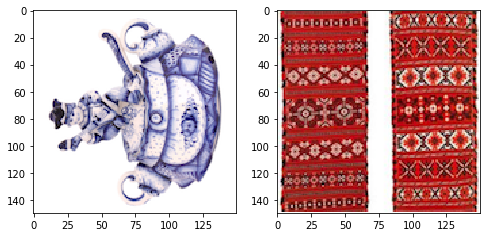

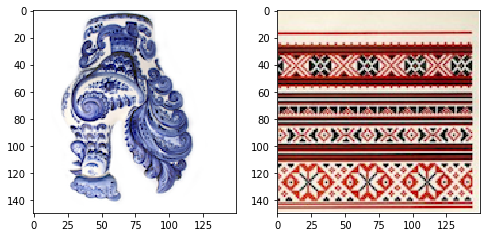

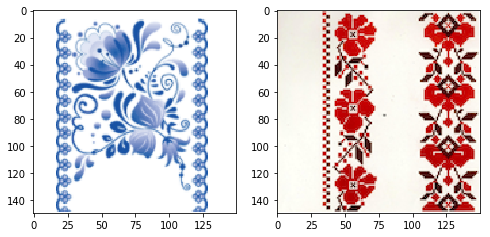

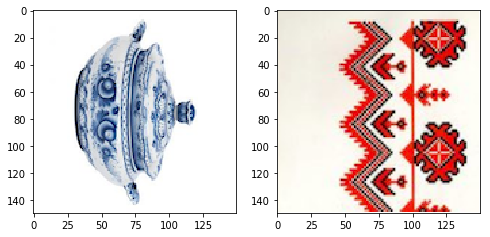

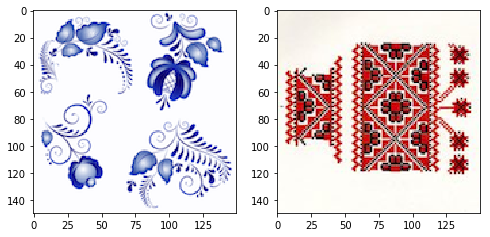

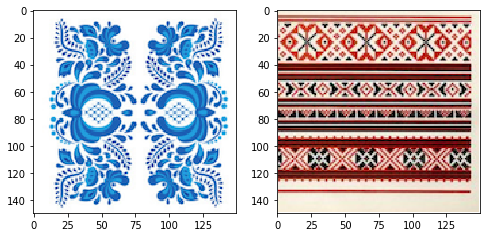

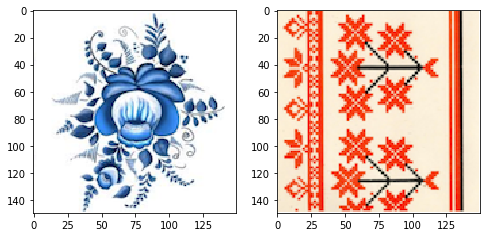

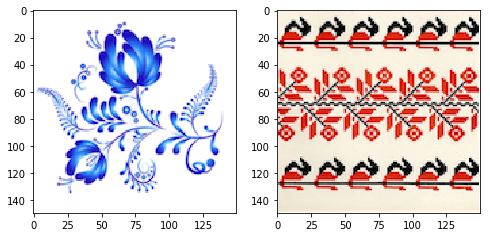

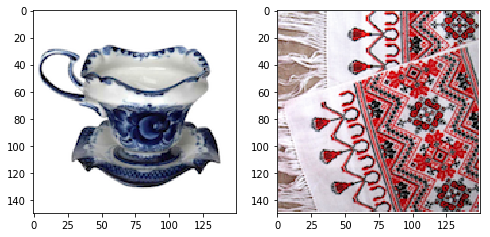

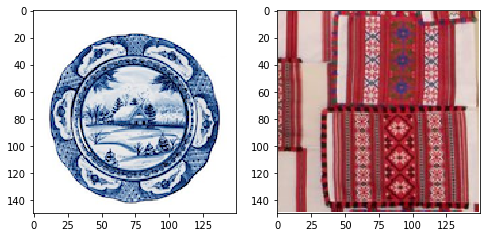

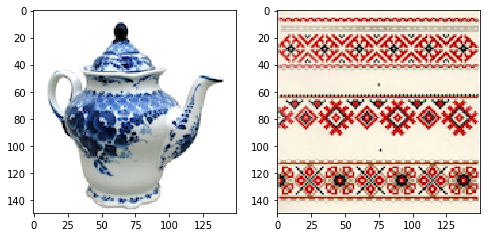

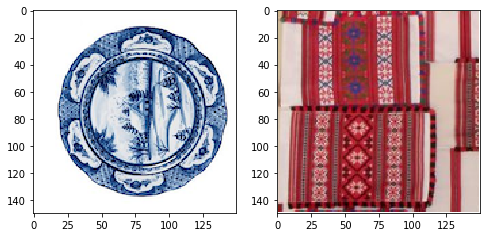

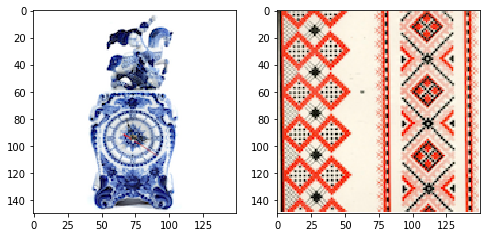

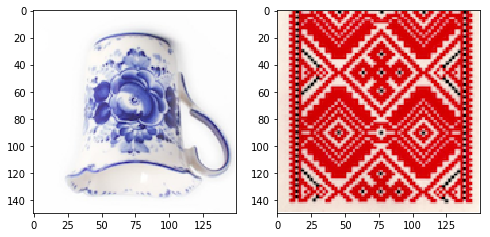

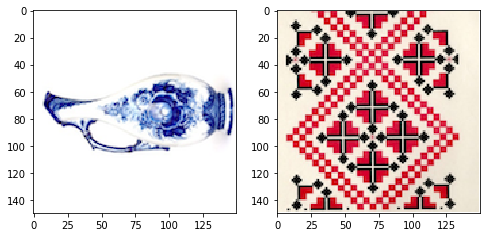

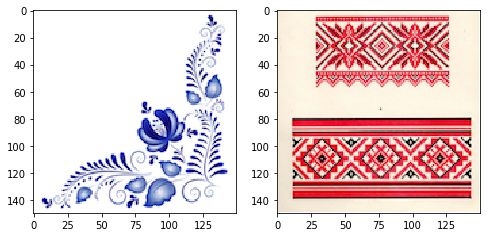

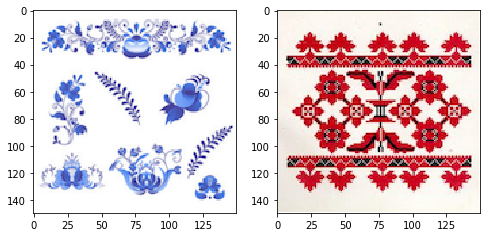

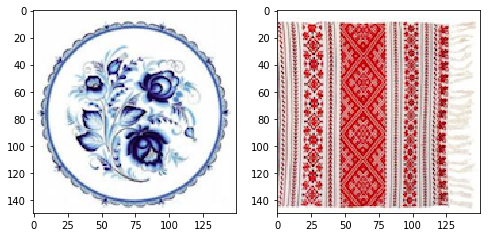

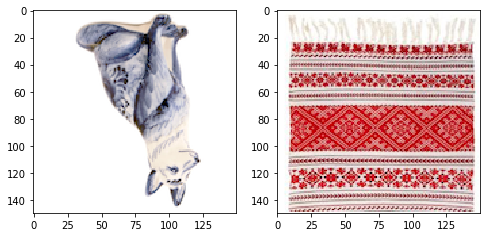

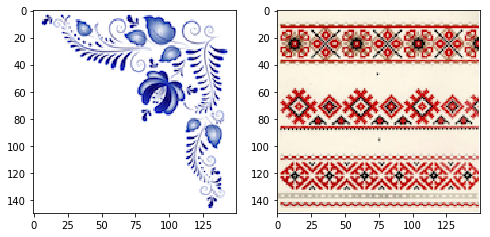

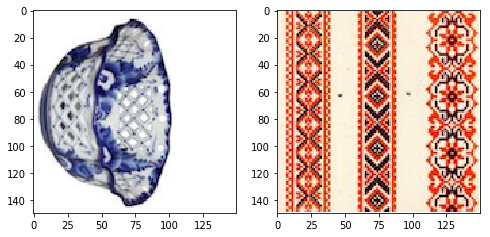

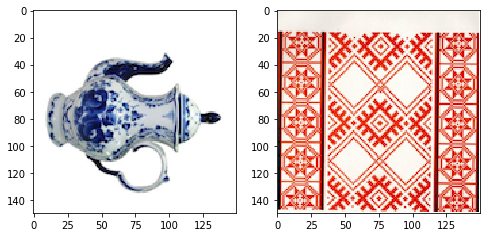

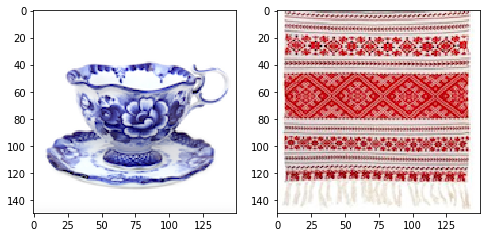

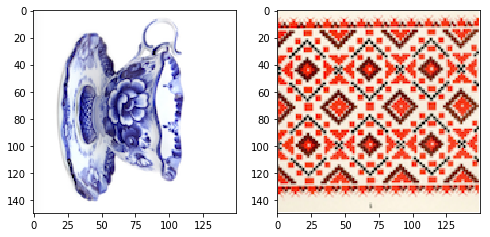

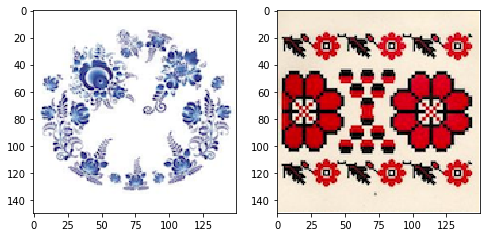

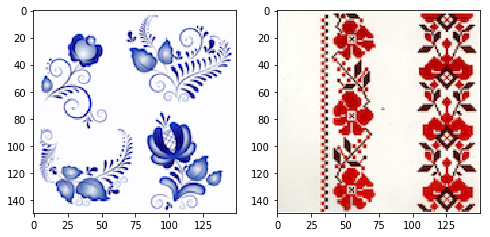

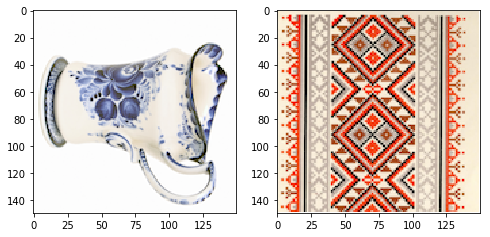

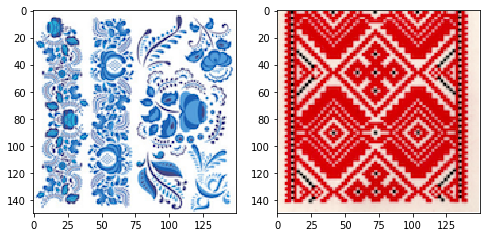

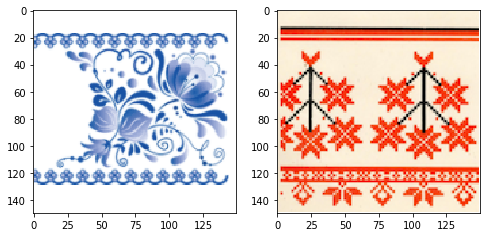

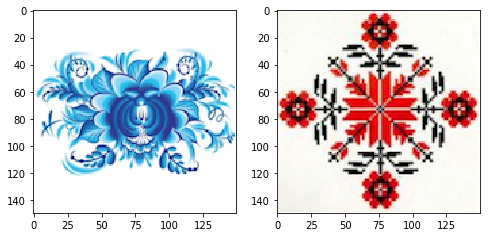

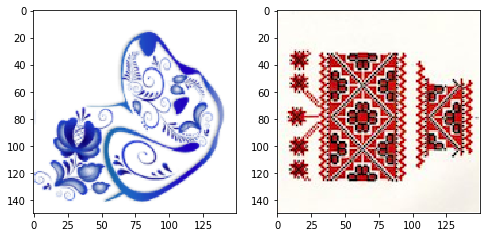

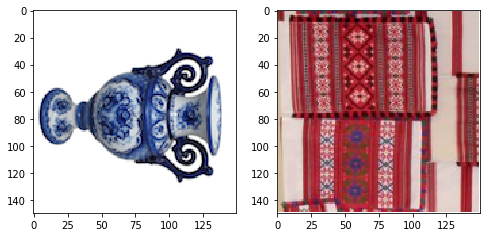

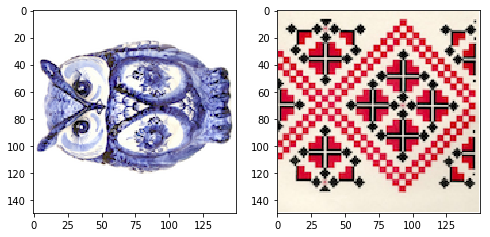

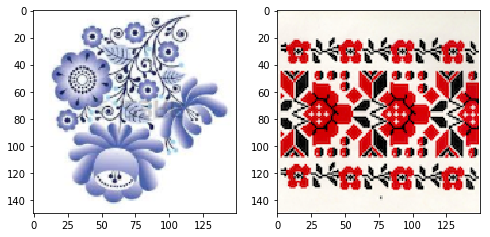

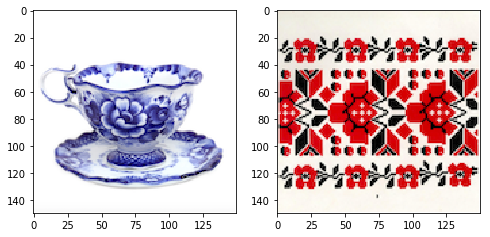

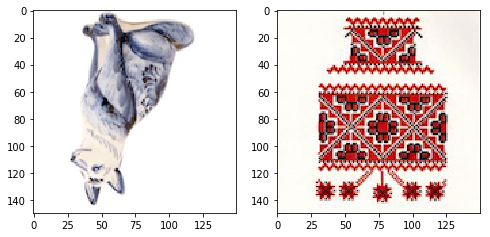

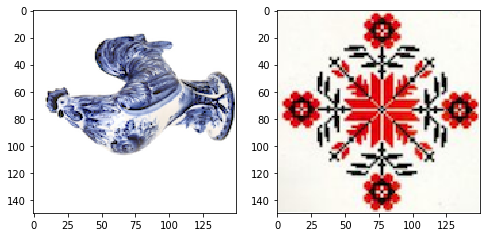

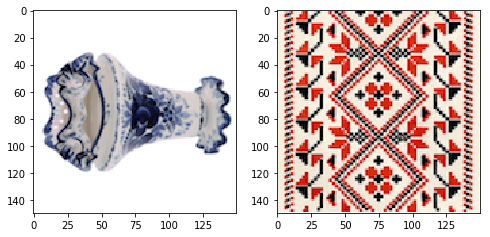

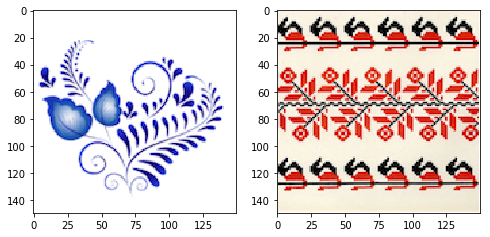

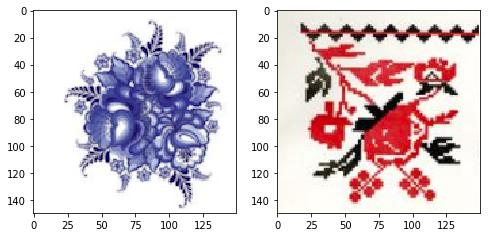

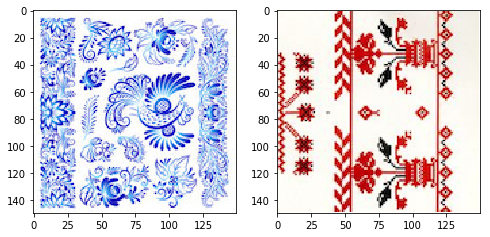

KeyboardInterrupt: 

In [7]:
try:
    step = 0   
    # feed data until the epoch limit is reached     
    while not coord.should_stop():
        step += 1
        img1, img2 = sess.run([images_1, images_2])
        
        fig=plt.figure(figsize=(8, 8))
        fig.add_subplot(1, 2, 1)
        plt.imshow(img1[0])
        fig.add_subplot(1, 2, 2)
        plt.imshow(img2[0])
        plt.show()
        
        
except tf.errors.OutOfRangeError:
    
    print('\nDone training -- epoch limit reached\n')
    
finally:
    
    # when done, ask the threads to stop
    coord.request_stop()

    # wait for threads to finish
    coord.join(threads)
    sess.close()